1/16
2/16
3/16
4/16
5/16
6/16
7/16
8/16
9/16
10/16
11/16
12/16
13/16
14/16
15/16
16/16



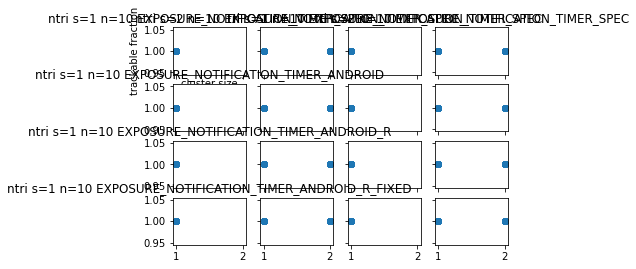

In [12]:
import gameoftrackers as got
import matplotlib.pyplot as plt
import numpy as np
import math
from gameoftrackers import TimeSeriesData, ExposureNotificationTimers, ExposureNotificationTimerTypes, SIMULATION_RUN_STEPS, DeviceOwnerAgent, run_game, render_game, Map

n_types = len(list(ExposureNotificationTimerTypes))
n_total = n_types * 2 * max_cluster
n_simulation_runs = 10
max_cluster = 2
i_total = 0

fig, ax = plt.subplots(2 * max_cluster, n_types, sharex='all', sharey='all')
fig.set_tight_layout(True)

for timer_type in ExposureNotificationTimerTypes:
    for triangulated in [False, True]:

        trackables = {}
        for cluster_size in range(1, max_cluster + 1):
            trackables[cluster_size] = run_game(
                n_simulation_runs=n_simulation_runs,
                cluster_size=cluster_size,
                triangulated=triangulated,
                timer_type=timer_type
            )

            axx = timer_type.value - 1
            axy = i_total % (2 * max_cluster)
            cax = ax[axx][axy]
            cax.cla()

            if axx == axy:
                cax.set_title("{} s={} n={} {}".format(
                    'tri' if triangulated else 'ntri',
                    cluster_size,
                    n_simulation_runs,
                    timer_type.name
                ))

            data = np.array([
                [i+1, t]
                for i in range(len(trackables))
                for t in trackables[i+1]
            ])
            x = data[:,0]
            y = data[:,1]

            cax.scatter(x=x, y=y)
            if axx == 0 and axy == 0:
                cax.set_xlabel('cluster size')
                cax.set_ylabel('trackable fraction')

            i_total += 1
            print(f"{i_total}/{n_total}")

print('')
plt.show()